<a href="https://colab.research.google.com/github/ciscopilux/NewsClassification/blob/master/Fake_and_Real_New_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chuẩn bị dữ liệu và công cụ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
import string
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
import plotly.offline as pyoff
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

In [2]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus.reader import wordnet
stop_w = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
sns.set()

In [5]:
false_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [8]:
true_df.sample(5)

,title,text,subject,date
11368,Russia's Lavrov says timing of Putin-Trump mee...,(This version of the Dec. 25 story was refile...,worldnews,"December 25, 2017"
9402,Obama to Asians worried about U.S. election: I...,"HO CHI MINH CITY, Vietnam (Reuters) - U.S. Pre...",politicsNews,"May 25, 2016"
9453,"Trump's Supreme Court list: all conservative, ...",Scroll to the bottom of the page for an intera...,politicsNews,"May 19, 2016"
9737,Jenner uses women's restroom at Trump property,Caitlyn Jenner posted a video on Wednesday (Ap...,politicsNews,"April 28, 2016"
2885,"Factbox: Trump on Twitter (July 7) - Putin, Ge...",The following statements were posted to the ve...,politicsNews,"July 7, 2017"


In [ ]:
# 11368, 9402, 9453, 9737, 2885

In [ ]:
true_df.shape

(21417, 4)

In [ ]:
false_df.sample(5)

,title,text,subject,date
23402,President Obama Arrives in Cuba,USA TODAYHAVANA The wheels of Air Force One ...,Middle-east,"March 21, 2016"
1701,WATCH: Nebraska Farmer Politely SHREDS Every ...,Landowners in Nebraska are understandably upse...,News,"April 24, 2017"
6850,Trump Is Now Officially Increasing The Chance...,Republicans aren t very smart about a lot of t...,News,"April 17, 2016"
20111,HOW PEOPLE MAGAZINE COVER Proves Hillary Has A...,Does anyone else get the sense Hillary is not ...,left-news,"Aug 16, 2016"
16591,FRIGHTENING Observations By A 75 Year Old Amer...,These are shocking revelations that have essen...,Government News,"May 26, 2016"


In [ ]:
false_df.index = range(true_df.shape[0], true_df.shape[0] + false_df.shape[0])
false_df.head()

,title,text,subject,date
21417,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
21418,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
21419,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
21420,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
21421,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df['label'] = 1
false_df['label'] = 0
full_df = pd.concat([true_df, false_df], axis=0)
full_df=full_df.sample(frac=1, random_state=123)
full_df.head()

,title,text,subject,date,label
41918,"ESPN SENIOR WRITER Says COPS, SOLDIERS Singing...",What happens when a black police officer sings...,left-news,"May 30, 2016",0
8149,Lawmaker says he misspoke about Republican Par...,WASHINGTON (Reuters) - Republican congressman ...,politicsNews,"September 14, 2016",1
29658,A**hole Of The Day – Michele Bachmann: Muslim...,Michele Bachmann has been pretty quiet since l...,News,"February 9, 2016",0
41855,New Book Reveals HILLARY’S ANTI-SEMITIC SIDE: ...,"Hillary doesn t recall saying it, but Bill s c...",left-news,"Jun 11, 2016",0
41890,CAN YOU GUESS THE ONE THING Majority Of Bernie...,The function of socialism is to raise sufferin...,left-news,"Jun 5, 2016",0


In [ ]:
X = full_df.drop(columns = ['label'])
y = full_df['label']

In [ ]:
count_real_fake = full_df['label'].value_counts()
ratio = count_real_fake / full_df.shape[0]
labels = ['Fake', 'Real']
explode = [0, 0.05]
palette_color = sns.color_palette('Blues_r')
ratio = ratio.to_list()

In [ ]:
trace = go.Pie(
        labels=['Fake', 'Real'],
        textinfo="percent",
        # textinfo="label+percent",
        values=[label_ratio for label_ratio in ratio])
# fig = go.Figure(data=plot_data_train, layout=plot_layout)
fig = go.Figure(data=[trace], layout={
        'showlegend': True,
        'title': 'Distribution of Fake/Real News Dataset',
        'plot_bgcolor': 'rgba(0,0,0,0)'
    })
fig.update_traces(marker=dict(
    colors=['blue', 'cyan'], line=dict(
        color='black',
        width=1
    ))) 
pyoff.iplot(fig)

In [ ]:
train_size = 0.8
X_train, X_temp, y_train, y_temp = train_test_split(X,y, train_size=train_size, random_state=123)
X_train.head()

,title,text,subject,date
9027,"Seeking to regain ground, Trump calls Clinton ...",NEW YORK (Reuters) - Republican presidential h...,politicsNews,"June 22, 2016"
34525,RED ALERT: CLINTON DESTROYED EVIDENCE IN TWO W...,,politics,"Sep 2, 2016"
14092,Exclusive: India pares back planned funding fo...,NEW DELHI (Reuters) - India has approved a thr...,worldnews,"November 23, 2017"
31726,WILLIAM SHATNER Blasts ‘Social Justice Warrior...,William Shatner is such a smarty pants on twit...,politics,"Jul 26, 2017"
661,Republicans confident of passing House tax bil...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"November 13, 2017"


In [ ]:
test_size = 0.1 # split 50%
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size=0.5, random_state = 123)
X_valid.head()

,title,text,subject,date
39389,Watch Live: #BenShapiro Speaks As #Berkeley An...,What happened to free speech? The left is tryi...,left-news,"Sep 14, 2017"
30081,You Won’t Believe What Rubio Said About The F...,We all know the GOP is out of touch with the p...,News,"January 19, 2016"
20225,More than 50 arrested for looting in Miami dur...,MIAMI (Reuters) - Miami area police arrested m...,worldnews,"September 12, 2017"
25143,Reince Priebus Says We ARE Going Forward With...,"On CNN s State of the Union yesterday, Reinc...",News,"November 21, 2016"
13320,"Egypt attack victims pray, mourn in Sinai mosq...","AL RAWDAH, Egypt (Reuters) - People wounded in...",worldnews,"December 1, 2017"


#Phân tích dữ liệu huấn luyện

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df.head()

,title,text,subject,date,label
9027,"Seeking to regain ground, Trump calls Clinton ...",NEW YORK (Reuters) - Republican presidential h...,politicsNews,"June 22, 2016",1
34525,RED ALERT: CLINTON DESTROYED EVIDENCE IN TWO W...,,politics,"Sep 2, 2016",0
14092,Exclusive: India pares back planned funding fo...,NEW DELHI (Reuters) - India has approved a thr...,worldnews,"November 23, 2017",1
31726,WILLIAM SHATNER Blasts ‘Social Justice Warrior...,William Shatner is such a smarty pants on twit...,politics,"Jul 26, 2017",0
661,Republicans confident of passing House tax bil...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,"November 13, 2017",1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35918 entries, 9027 to 11969
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   label    35918 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
train_df.describe()

,label
count,35918.000000
mean,0.476335
std,0.499447
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Remove not date format
pattern_link = "http"
filter_link = train_df['date'].str.contains(pattern_link)
train_df.loc[filter_link]

,title,text,subject,date,label
37256,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0
38850,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
36925,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0
38849,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,0
43287,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,0


In [ ]:
# Just get date format
pattern_month = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter_date = train_df['date'].str.contains(pattern_month)
train_df = train_df.loc[filter_date]
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.shape

(35912, 5)

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])

In [ ]:
df_shape = train_df.shape
df_shape

(35912, 5)

In [ ]:
count_real_fake = train_df['label'].value_counts()
ratio = count_real_fake / df_shape[0]
labels = ['Fake', 'Real']
explode = [0, 0.05]
palette_color = sns.color_palette('Blues_r')
ratio

0    0.523585
1    0.476415
Name: label, dtype: float64

In [ ]:
ratio = ratio.tolist()
ratio

[0.5235854310536868, 0.47641456894631323]

In [ ]:
trace = go.Pie(
        labels=['Fake', 'Real'],
        textinfo="percent",
        # textinfo="label+percent",
        values=[label_ratio for label_ratio in ratio])
# fig = go.Figure(data=plot_data_train, layout=plot_layout)
fig = go.Figure(data=[trace], layout={
        'showlegend': True,
        'title': 'Distribution of Fake/Real News in Training Dataset',
        'plot_bgcolor': 'rgba(0,0,0,0)'
    })
fig.update_traces(marker=dict(
    colors=['blue', 'cyan'], line=dict(
        color='black',
        width=1
    )))
pyoff.iplot(fig)

In [ ]:
train_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [ ]:
df_sub = train_df.groupby(['subject', 'label'])[['text']].count()
df_sub.reset_index(inplace=True)
df_sub = df_sub.rename(columns={"text": "count"})
df_sub

,subject,label,count
0,Government News,0,1255
1,Middle-east,0,635
2,News,0,7233
3,US_News,0,628
4,left-news,0,3559
5,politics,0,5493
6,politicsNews,1,9052
7,worldnews,1,8057


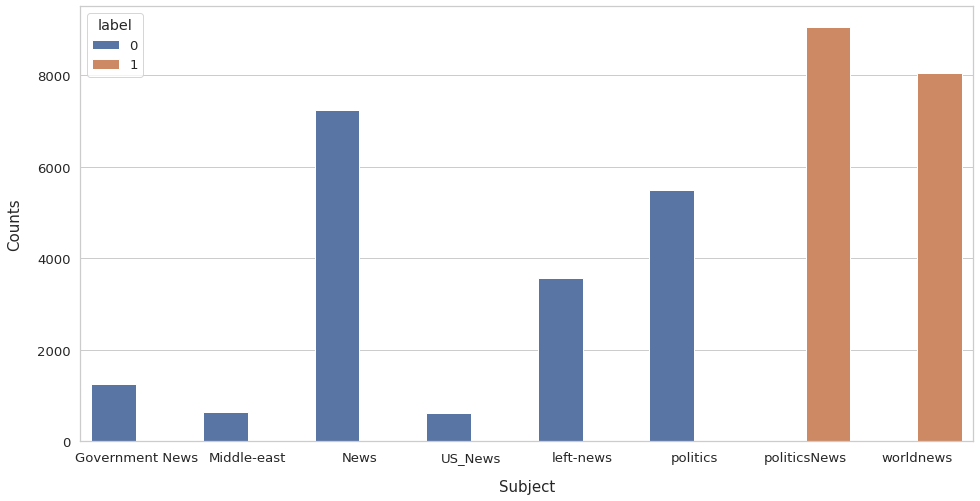

In [ ]:
plt.figure(figsize = (16,8))
sns.set(style = "whitegrid",font_scale = 1.2)
# chart = sns.barplot(x = "subject", y = "count", hue = "label", data = df_sub)
# chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

chart = sns.barplot(
    x="subject", 
    y="count", 
    hue="label", 
    data=df_sub,  
)
plt.xlabel('Subject', labelpad=15, fontsize=15)
plt.ylabel('Counts',labelpad=15, fontsize=15)
# plt.legend(title='Type News', loc='upper left', labels=['False', 'True'], labelcolor='linecolor')
# plt.legend(labelcolors='linecolor')
plt.show(chart)

In [ ]:
train_df_real = train_df.loc[train_df['label'] == 1]
train_df_real= train_df_real.groupby(['date'])['label'].count()
train_df_real = pd.DataFrame(train_df_real)
train_df_real

,label
date,
2016-01-13,26
2016-01-14,13
2016-01-15,19
2016-01-16,5
2016-01-17,3
...,...
2017-12-27,48
2017-12-28,3
2017-12-29,4


In [ ]:
train_df_fake = train_df.loc[train_df['label'] == 0]
train_df_fake= train_df_fake.groupby(['date'])['label'].count()
train_df_fake = pd.DataFrame(train_df_fake)
train_df_fake

,label
date,
2015-03-31,7
2015-04-01,1
2015-04-04,3
2015-04-05,8
2015-04-06,20
...,...
2018-02-15,9
2018-02-16,7
2018-02-17,7


In [ ]:

plot_data_train = [
    go.Scatter(
        x=train_df_real.index,
        y=train_df_real['label'],
        name='True'
    ),
    go.Scatter(
        x=train_df_fake.index,
        y=train_df_fake['label'],
        name='Fake'
    )
    
]
plot_layout = go.Layout(
        title='Distribution News By Day Publish',
        yaxis_title='News Count',
        xaxis_title='Date',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data_train, layout=plot_layout)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='black')
pyoff.iplot(fig)

In [ ]:
blank_text_df = train_df.loc[train_df['text'].str.strip() == ""]
blank_text_df.head()

,title,text,subject,date,label
34525,RED ALERT: CLINTON DESTROYED EVIDENCE IN TWO W...,,politics,2016-09-02,0
34125,WIKILEAKS SMOKING GUN: Here’s Best Proof Hilla...,,politics,2016-10-17,0
34248,A MUST SEE! MEDIA SCORCHED FOR THEIR BIAS AGAI...,,politics,2016-10-04,0
41003,ALMOST 100 YEARS LATER…Donald Trump Sounds A L...,,left-news,2016-11-19,0
37744,BREAKING: OBAMA CAUGHT ON LIVE TV Telling Ille...,,Government News,2016-11-06,0


In [ ]:
blank_text_df.groupby('label')[['title']].count().reset_index()

,label,title
0,0,494


In [ ]:

train_df.loc[train_df['title'].str.strip() == ""].head()

,title,text,subject,date,label


In [ ]:
train_df.iloc[10123]['title']

'PUTZ OBAMA Calls Electoral College A ‘Vestige’ Of An ‘Earlier time In America’'

In [ ]:
train_df["title_hashtag"]= train_df['title'].str.find(r'#.*?(?=\s|$)')
train_df.loc[train_df['title_hashtag'] != -1].head()

,title,text,subject,date,label,title_hashtag


In [ ]:
train_df["text_hashtag"]= train_df['text'].str.find(r'#.*?(?=\s|$)')
train_df.loc[train_df['text_hashtag'] != -1].head()

,title,text,subject,date,label,title_hashtag,text_hashtag


In [ ]:
train_df['length_text'] = train_df['text'].apply(len)

In [ ]:
train_df[train_df['label'] == 1]['length_text'].describe()

count    17109.000000
mean      2388.668303
std       1689.955659
min        152.000000
25%        929.000000
50%       2224.000000
75%       3245.000000
max      29781.000000
Name: length_text, dtype: float64

In [ ]:
train_df[train_df['label'] == 0]['length_text'].describe()

count    18803.000000
mean      2550.783013
std       2586.900105
min          1.000000
25%       1431.000000
50%       2162.000000
75%       3022.000000
max      51794.000000
Name: length_text, dtype: float64

In [ ]:
few_text_df = train_df.loc[train_df['length_text'] < 100]
label_few_text = few_text_df.groupby('label')[['title']].count().reset_index()
label_few_text.rename(columns={"title": "count"})

,label,count
0,0,810


In [ ]:
few_text_df.loc[few_text_df['label'] == 1]

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text


In [ ]:
few_text_df.loc[few_text_df['label'] == 0]

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text
34525,RED ALERT: CLINTON DESTROYED EVIDENCE IN TWO W...,,politics,2016-09-02,0,-1,-1,1
34125,WIKILEAKS SMOKING GUN: Here’s Best Proof Hilla...,,politics,2016-10-17,0,-1,-1,1
34248,A MUST SEE! MEDIA SCORCHED FOR THEIR BIAS AGAI...,,politics,2016-10-04,0,-1,-1,1
42099,WATCH: Duck Dynasty’s Willie Robertson Makes D...,You gotta love the socialist duck analogy,left-news,2016-04-25,0,-1,-1,42
41003,ALMOST 100 YEARS LATER…Donald Trump Sounds A L...,,left-news,2016-11-19,0,-1,-1,1
...,...,...,...,...,...,...,...,...
36675,(VIDEO) GOV SARAH PALIN’S INTERVIEW WITH DONAL...,Sarah Palin interviewed The Donald tonight on ...,politics,2015-08-28,0,-1,-1,95
38653,(VIDEO) TREY GOWDY ON BENGHAZI AND POSSIBILITY...,Hillary Clinton hasn t given up all the e-mails?,Government News,2015-06-28,0,-1,-1,49
34114,DEMOCRATS ADMIT PLAN To Commit Mass Voter Frau...,,politics,2016-10-18,0,-1,-1,1
34234,NO JOKE! THE LYIN’ HILLARY DOLL IS HERE!…18 Li...,HERE S SOMEONE GOING THROUGH ALL 18 LIES WOW!,politics,2016-10-06,0,-1,-1,46


In [ ]:
few_text_df.loc[few_text_df['text'].str.strip() != ""]

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text
42099,WATCH: Duck Dynasty’s Willie Robertson Makes D...,You gotta love the socialist duck analogy,left-news,2016-04-25,0,-1,-1,42
33672,BRILLIANT! TUCKER CARLSON Humiliates Jill Stei...,https://www.youtube.com/watch?v=uQbAww5wajA,politics,2016-11-30,0,-1,-1,43
33221,PRESIDENT TRUMP Calls Out Media For Ignoring P...,https://www.youtube.com/watch?v=aHkNzBRqPCE,politics,2017-01-26,0,-1,-1,43
42194,WOW! VIDEO SURFACES OF BERNIE SANDERS Praising...,Please share this everywhere! Especially to an...,left-news,2016-04-05,0,-1,-1,88
38590,(VIDEO) REV AL SHARPTON BOTCHES THE NAME OF A ...,REVEREND AL MIGHT WANT TO GO BACK TO SCHOOL OR...,Government News,2015-07-24,0,-1,-1,55
...,...,...,...,...,...,...,...,...
35939,LET’S PLAY! CAN YOU ANSWER The 21 Questions Th...,CAN YOU DO IT? WE D LOVE TO KNOW WHAT SURPRISE...,politics,2016-02-06,0,-1,-1,66
36675,(VIDEO) GOV SARAH PALIN’S INTERVIEW WITH DONAL...,Sarah Palin interviewed The Donald tonight on ...,politics,2015-08-28,0,-1,-1,95
38653,(VIDEO) TREY GOWDY ON BENGHAZI AND POSSIBILITY...,Hillary Clinton hasn t given up all the e-mails?,Government News,2015-06-28,0,-1,-1,49
34234,NO JOKE! THE LYIN’ HILLARY DOLL IS HERE!…18 Li...,HERE S SOMEONE GOING THROUGH ALL 18 LIES WOW!,politics,2016-10-06,0,-1,-1,46


In [ ]:
langer_text_df = train_df.loc[train_df['length_text'] > 10000]
label_check_langer = np.unique(langer_text_df['label'], return_counts=True)
label_check_langer

(array([0, 1]), array([267,  21]))

In [ ]:
langer_text_df.loc[langer_text_df["label"] == 1].head()

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text
3319,Text: Ex-FBI Director Comey's prepared testimo...,(Reuters) - Following is the full text of form...,politicsNews,2017-06-07,1,-1,-1,18541
2816,Transcript of Reuters interview with EPA Admin...,(Reuters) - U.S. Environmental Protection Agen...,politicsNews,2017-07-12,1,-1,-1,29781
7485,Trump rewrote political playbook in successful...,WASHINGTON (Reuters) - Donald Trump’s successf...,politicsNews,2016-11-09,1,-1,-1,10076
6515,Trump fills top jobs for his administration,(Reuters) - President-elect Donald Trump on We...,politicsNews,2017-01-04,1,-1,-1,11201
8465,"Disillusionment, U.S.A. Where voters are just ...","ALGONAC, MICH.—Parker Fox drifted out of the D...",politicsNews,2016-08-14,1,-1,-1,21661


In [ ]:
langer_text_df.loc[langer_text_df["label"] == 0].head()

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text
43905,"BUSH-HINCKLEY NEXUS: Reagan Gunman Released, R...",Shawn Helton 21st Century WireOn the eve of th...,US_News,2016-09-09,0,-1,-1,20556
44387,BREAKING: Wikileaks Releases ‘Vault 7’ Part 1 ...,21st Century Wire says WikiLeaks has released ...,Middle-east,2017-03-07,0,-1,-1,26453
34988,HOW DID HILLARY’S MUSLIM AIDE Get Security Cle...,We ve all had questions about Huma Abedin but ...,politics,2016-07-06,0,-1,-1,12890
43686,PROBLEM: Trump vs. The US Intelligence Machine,21st Century Wire says The intelligence agenci...,US_News,2017-01-17,0,-1,-1,10073
43940,DALLAS “ATTACK” DIALECTICS: Summer of Uncle Sam,Jay Dyer 21st Century WireAs the recent events...,US_News,2016-07-09,0,-1,-1,18773


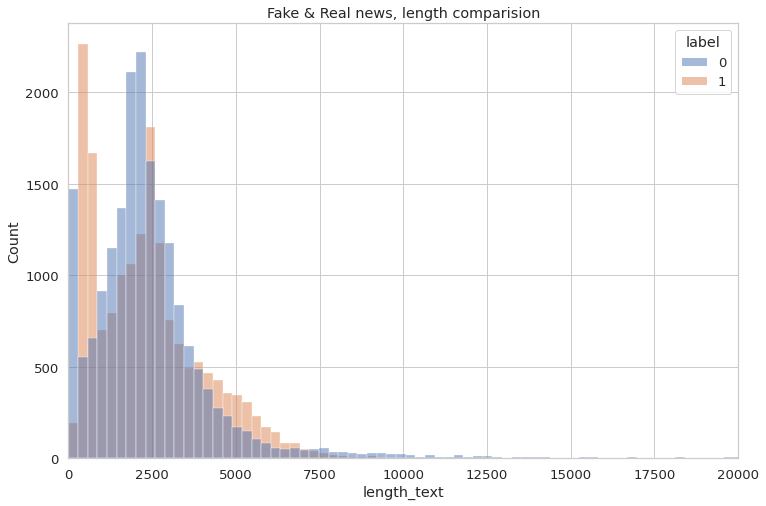

In [ ]:
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = train_df['length_text'],
    hue = train_df['label'],
    bins=180
)
plt.xlim([0, 20000])
plt.title("Fake & Real news, length comparision")
plt.show()
# Width of each bin is = (max value of data – min value of data) / total number of bins 
# Choose bin base on Freedman–Diaconis rule 
# => bins = 2 * IQR(x) / sqrt[3](n). n is number of row in dataset = 2 * (3245 - 929) / sqrt[3](17109) ~ 180
# Width of each bin = (51794 - 1) / 180 ~ 288

In [ ]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split(" ")))
train_df.loc[train_df['label'] == 0 ]['word_count'].describe()

count    18803.000000
mean       435.820826
std        429.754912
min          1.000000
25%        245.000000
50%        373.000000
75%        517.000000
max       8436.000000
Name: word_count, dtype: float64

In [ ]:
train_df.loc[train_df['label'] == 1 ]['word_count'].describe()

count    17109.000000
mean       395.393302
std        282.455652
min         23.000000
25%        155.000000
50%        367.000000
75%        538.000000
max       5175.000000
Name: word_count, dtype: float64

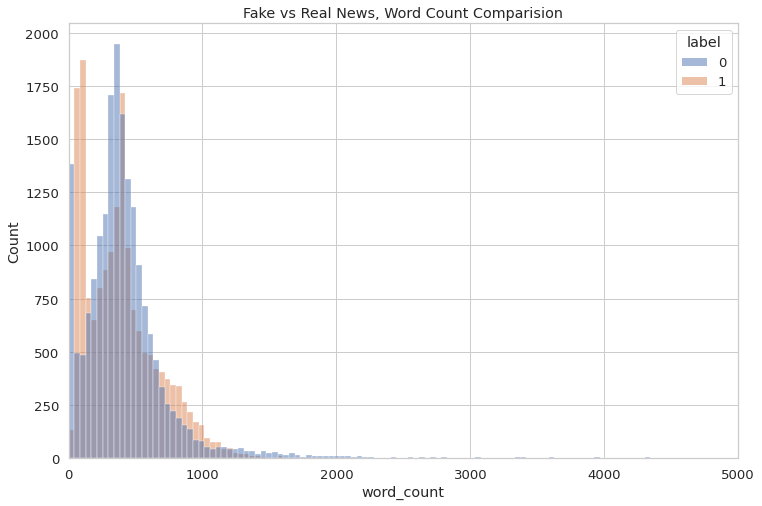

In [ ]:
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split(" ")))
fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = train_df['word_count'],
    hue = train_df['label'],
    bins=200
)
plt.xlim([0, 5000])
plt.title("Fake vs Real News, Word Count Comparision")
plt.show()

In [ ]:
train_df['num_stop_word'] = train_df['text'].apply(lambda x: len([word for word in x.split(" ") if word in stop_w]))
train_df.loc[train_df['label'] == 1 ]['num_stop_word'].describe()

count    17109.000000
mean       141.890642
std        103.814448
min          5.000000
25%         54.000000
50%        129.000000
75%        195.000000
max       2241.000000
Name: num_stop_word, dtype: float64

In [ ]:
train_df.loc[train_df['label'] == 0 ]['num_stop_word'].describe()

count    18803.000000
mean       170.757166
std        164.999737
min          0.000000
25%         92.000000
50%        148.000000
75%        207.000000
max       3017.000000
Name: num_stop_word, dtype: float64

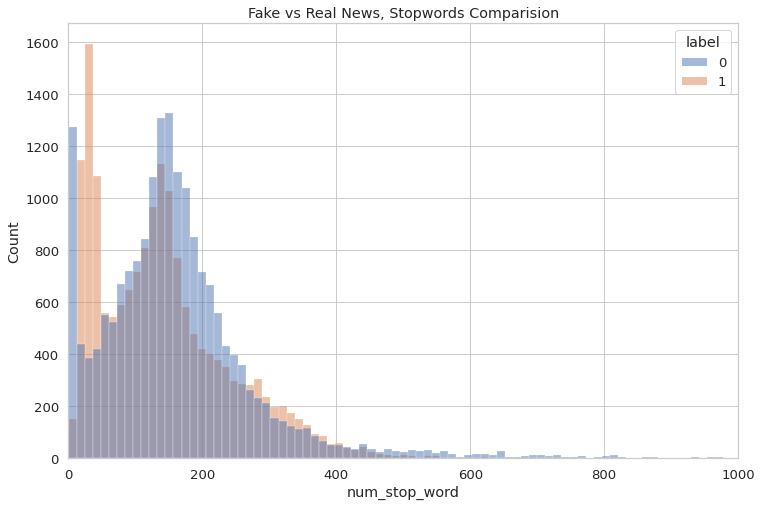

In [ ]:

fig = plt.figure(figsize=(12, 8))
sns.histplot(
    x = train_df['num_stop_word'],
    hue = train_df['label'],
    bins=250
)
plt.xlim([0, 1000])
plt.title("Fake vs Real News, Stopwords Comparision")
plt.show()

In [ ]:
big_word_count_df = train_df.loc[train_df['word_count'] > 1500]
big_word_count_df = np.unique(big_word_count_df['label'], return_counts=True)
big_word_count_df

(array([0, 1]), array([367,  34]))

In [ ]:
pattern_link = "http"
filter_link = train_df['text'].str.contains(pattern_link)
news_contain_link = train_df.loc[filter_link]
news_contain_link.groupby('label')['text'].count()

label
0    2669
Name: text, dtype: int64

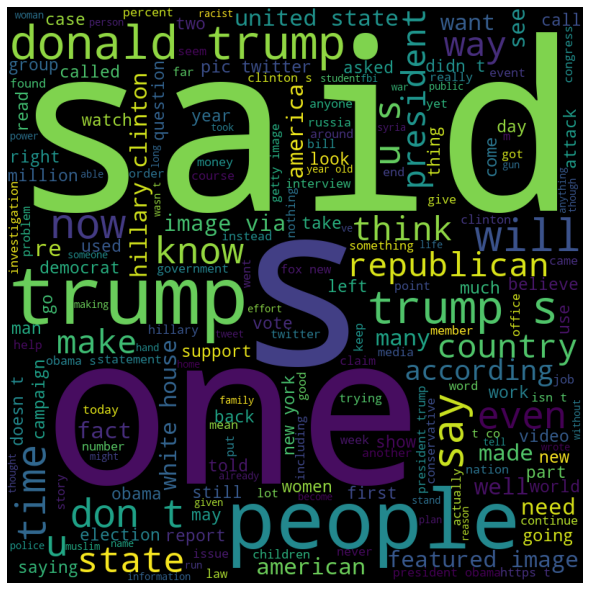

In [ ]:
# Fake
comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for content in train_df.loc[train_df['label'] == 0]['text']: 
    # typecaste each val to string 
    content = str(content) 
    tokens = content.split(" ") 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()       
    comment_words += " ".join(tokens) + " "
 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

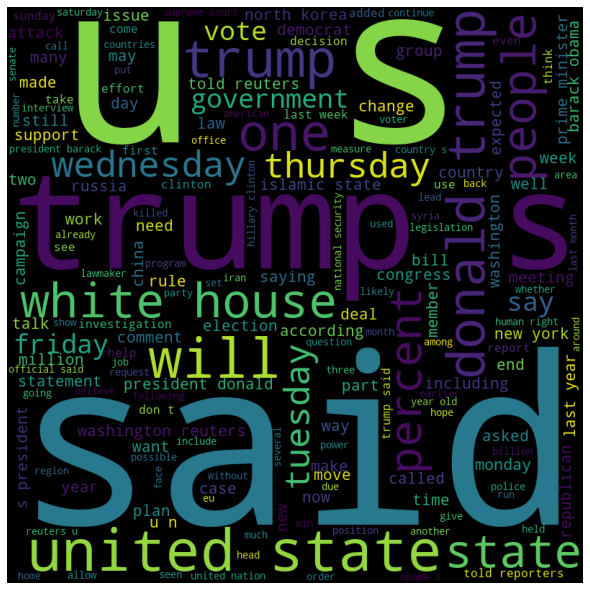

In [ ]:
# Real
comment_words = '' 
stopwords = set(STOPWORDS) 
# iterate through the csv file 
for content in train_df.loc[train_df['label'] == 1]['text']: 
    # typecaste each val to string 
    content = str(content) 
    tokens = content.split(" ") 
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower()       
    comment_words += " ".join(tokens) + " "
 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [ ]:
lower_title = train_df.loc[train_df['title'].str.lower() == train_df['title']]
lower_title.groupby("label")[["text"]].count().reset_index()

,label,text


In [ ]:
lower_text = train_df.loc[train_df['text'].str.lower() == train_df['text']]
lower_text.groupby("label")[["text"]].count().reset_index()

,label,text
0,0,494


In [ ]:
lower_text.loc[train_df['length_text'] > 10].head()

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text,word_count,num_stop_word


In [ ]:
lower_title.head(10)

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text,word_count,num_stop_word


In [ ]:
upper_title = train_df.loc[train_df['title'].str.upper() == train_df['title']]
upper_title.groupby("label")["text"].count().reset_index()

,label,text
0,0,555


In [ ]:
upper_title

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text,word_count,num_stop_word
43319,TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUN...,It s not for her to decide! We have the Second...,left-news,2015-04-06,0,-1,-1,1389,237,92
38793,OBAMACARE TAKING DOWN MORE RURAL HOSPITALS,Let s face it Obamacare s been a disaster from...,Government News,2015-05-02,0,-1,-1,3347,558,225
38620,BREAKING: OPM DIRECTOR RESIGNS AFTER HACK – IS...,Something isn t right here besides the 22 mill...,Government News,2015-07-10,0,-1,-1,1333,224,92
37249,CUBA STILL A COMMIE HELLHOLE AFTER OBAMA’S “NO...,Don t you know Obama would love to just throw ...,politics,2015-04-13,0,-1,-1,1449,240,91
38532,WHY WE STAND WITH KIM DAVIS ON HER REFUSAL TO ...,Ben Shapiro makes the best case yet for why Am...,Government News,2015-09-05,0,-1,-1,4278,709,276
...,...,...,...,...,...,...,...,...,...,...
43021,MACY’S CELEBRATES AMERICA’S INDEPENDENCE BY PU...,Americans need to put American citizens first ...,left-news,2015-07-01,0,-1,-1,2949,514,196
42146,ECONOMIC SYSTEMS BRILLIANTLY EXPLAINED WITH COWS,Share this with everyone! There s a good reaso...,left-news,2016-04-16,0,-1,-1,489,80,34
38653,(VIDEO) TREY GOWDY ON BENGHAZI AND POSSIBILITY...,Hillary Clinton hasn t given up all the e-mails?,Government News,2015-06-28,0,-1,-1,49,10,5
38597,BEST TWEET OF THE DAY,Why should armed civilians have to protect and...,Government News,2015-07-21,0,-1,-1,457,68,22


In [ ]:
upper_text = train_df.loc[train_df['text'].str.upper() == train_df['text']]
upper_text.groupby("label")["text"].count().reset_index()

,label,text
0,0,528


In [ ]:
upper_text.loc[upper_text['length_text'] > 20].shape[0]

31

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
train_df['num_special_char'] = train_df['text'].apply(lambda x: len([char for char in x if char in string.punctuation]))
train_df.head()

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text,word_count,num_stop_word,num_special_char
9027,"Seeking to regain ground, Trump calls Clinton ...",NEW YORK (Reuters) - Republican presidential h...,politicsNews,2016-06-22,1,-1,-1,5306,878,307,98
34525,RED ALERT: CLINTON DESTROYED EVIDENCE IN TWO W...,,politics,2016-09-02,0,-1,-1,1,2,0,0
14092,Exclusive: India pares back planned funding fo...,NEW DELHI (Reuters) - India has approved a thr...,worldnews,2017-11-23,1,-1,-1,5139,829,277,117
31726,WILLIAM SHATNER Blasts ‘Social Justice Warrior...,William Shatner is such a smarty pants on twit...,politics,2017-07-26,0,-1,-1,1144,201,63,27
661,Republicans confident of passing House tax bil...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,2017-11-13,1,-1,-1,716,119,48,25


In [ ]:
non_special_char = train_df.loc[(train_df['num_special_char'] == 0) & (train_df['length_text'] != 1)]
non_special_char.head()

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text,word_count,num_stop_word,num_special_char
42099,WATCH: Duck Dynasty’s Willie Robertson Makes D...,You gotta love the socialist duck analogy,left-news,2016-04-25,0,-1,-1,42,8,1,0
38590,(VIDEO) REV AL SHARPTON BOTCHES THE NAME OF A ...,REVEREND AL MIGHT WANT TO GO BACK TO SCHOOL OR...,Government News,2015-07-24,0,-1,-1,55,13,0,0
35463,WATCH: Duck Dynasty’s Willie Robertson Makes D...,You gotta love the socialist duck analogy,politics,2016-04-25,0,-1,-1,42,8,1,0
33480,OUCH! Paul Joseph Watson DESTROYS MTV’s Racist...,Enjoy,politics,2016-12-26,0,-1,-1,6,2,0,0
36237,TRUMP SPOKESPERSON Hammers it Home On Trump’s ...,Katrina Pierson does a fantastic job with this...,politics,2015-12-08,0,-1,-1,59,12,4,0


In [ ]:
sr_special_gr_count = non_special_char.groupby('label')['title'].count()

In [ ]:
trace = go.Pie(
        labels=['Fake', 'Real'],
        textinfo="percent",
        # textinfo="label+percent",
        values=[label_ratio for label_ratio in sr_special_gr_count.to_numpy()])
# fig = go.Figure(data=plot_data_train, layout=plot_layout)
fig = go.Figure(data=[trace], layout={
        'showlegend': True,
        'title': 'Distribution of Fake/Real News which text dont have any special character',
        'plot_bgcolor': 'rgba(0,0,0,0)'
    })
fig.update_traces(marker=dict(
    colors=['blue', 'cyan'], line=dict(
        color='black',
        width=1
    )))
pyoff.iplot(fig)

In [ ]:
def contain_link(text):
    import re
    if re.search(r'http\S+', text):
      return True
    if re.search(r'bit.ly\S+', text):
      return True
    if len(text) != len(text.strip('[link]')):
      return True
    return False

In [ ]:
train_df['contain_link'] = train_df['text'].apply(contain_link)
dist_contain_link = train_df.groupby(['label', 'contain_link'])[['title']].count()
dist_contain_link.reset_index(inplace=True)
dist_contain_link = dist_contain_link.rename(columns={'label': 'label', 'contain_link': 'is_contain_link', 'title': 'count'})
dist_contain_link

,label,is_contain_link,count
0,0,False,15612
1,0,True,3191
2,1,False,16978
3,1,True,131


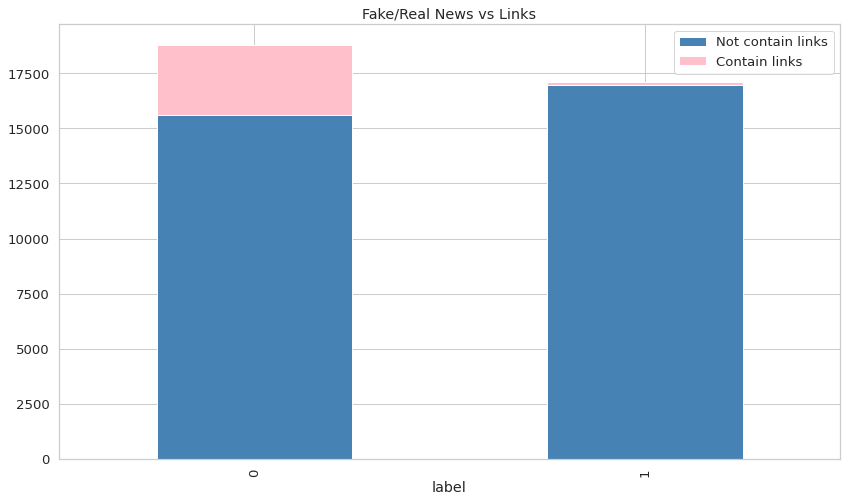

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
train_df.groupby(['label', 'contain_link']).size().unstack().plot(kind='bar', stacked=True,
            color=['steelblue','pink'], title='Fake/Real News vs Links', ax=ax)
ax.legend(["Not contain links", "Contain links"], loc=1);

#Tiền xử lý dữ liệu, trích rút đặc trưng

In [ ]:
train_df.head()

,title,text,subject,date,label,title_hashtag,text_hashtag,length_text,word_count,num_stop_word,num_special_char,contain_link
9027,"Seeking to regain ground, Trump calls Clinton ...",NEW YORK (Reuters) - Republican presidential h...,politicsNews,2016-06-22,1,-1,-1,5306,878,307,98,False
34525,RED ALERT: CLINTON DESTROYED EVIDENCE IN TWO W...,,politics,2016-09-02,0,-1,-1,1,2,0,0,False
14092,Exclusive: India pares back planned funding fo...,NEW DELHI (Reuters) - India has approved a thr...,worldnews,2017-11-23,1,-1,-1,5139,829,277,117,False
31726,WILLIAM SHATNER Blasts ‘Social Justice Warrior...,William Shatner is such a smarty pants on twit...,politics,2017-07-26,0,-1,-1,1144,201,63,27,False
661,Republicans confident of passing House tax bil...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,2017-11-13,1,-1,-1,716,119,48,25,False


In [ ]:
X_train['full_text'] = X_train['subject'] + ' ' + X_train['title'] + ' ' + X_train['text']
X_valid['full_text'] = X_valid['subject'] + ' ' + X_valid['title'] + ' ' + X_valid['text']
X_test['full_text'] = X_test['subject'] + ' ' + X_test['title'] + ' ' + X_test['text']

In [ ]:
X_train.columns

Index(['title', 'text', 'subject', 'date', 'full_text'], dtype='object')

In [ ]:
X_train = X_train.drop(columns=['title', 'text', 'subject', 'date'])
X_valid = X_valid.drop(columns=['title', 'text', 'subject', 'date'])
X_test = X_test.drop(columns=['title', 'text', 'subject', 'date'])

In [ ]:
X_train['length_text'] = X_train['full_text'].apply(len)
X_valid['length_text'] = X_valid['full_text'].apply(len)
X_test['length_text'] = X_test['full_text'].apply(len)

In [ ]:
X_train['word_count'] = X_train['full_text'].apply(lambda x: len(x.split(" ")))
X_valid['word_count'] = X_valid['full_text'].apply(lambda x: len(x.split(" ")))
X_test['word_count'] = X_test['full_text'].apply(lambda x: len(x.split(" ")))

In [ ]:
X_train['num_stop_w'] = X_train['full_text'].apply(lambda x: len([word for word in x.split(" ") if word in stop_w]))
X_valid['num_stop_w'] = X_valid['full_text'].apply(lambda x: len([word for word in x.split(" ") if word in stop_w]))
X_test['num_stop_w'] = X_test['full_text'].apply(lambda x: len([word for word in x.split(" ") if word in stop_w]))

In [ ]:
X_train['num_special_char'] = X_train['full_text'].apply(lambda x: len([char for char in x if char in string.punctuation]))
X_valid['num_special_char'] = X_valid['full_text'].apply(lambda x: len([char for char in x if char in string.punctuation]))
X_test['num_special_char'] = X_test['full_text'].apply(lambda x: len([char for char in x if char in string.punctuation]))

In [ ]:
X_train['contains_num'] = X_train['full_text'].apply(lambda x: len([word for word in x if any(map(str.isdigit, word))]))
X_valid['contains_num'] = X_valid['full_text'].apply(lambda x: len([word for word in x if any(map(str.isdigit, word))]))
X_test['contains_num'] = X_test['full_text'].apply(lambda x: len([word for word in x if any(map(str.isdigit, word))]))

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 6.6 MB/s 


In [ ]:
spell = SpellChecker()

In [ ]:
s = "Good muffins cost $3.88\nin New York.  Please buy me\ntwo of them.\n\nThanks."

In [ ]:
regexp = RegexpTokenizer("[\w']+")
regexp.tokenize(s)

['Good',
 'muffins',
 'cost',
 '3',
 '88',
 'in',
 'New',
 'York',
 'Please',
 'buy',
 'me',
 'two',
 'of',
 'them',
 'Thanks']

In [ ]:
def pyspellchecker_check(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    ans = 0
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                # word_list_corrected.append(word)
                pass
            else:
                # print(word_corrected)
                # word_list_corrected.append(word_corrected)
                ans += 1
        # else:
        #     word_list_corrected.append(word)
    # text_corrected = " ".join(word_list_corrected)
    return ans

In [ ]:
# X_train['count_wrong_spell'] = X_train['full_text'].apply(pyspellchecker_check)
# X_test['count_wrong_spell'] = X_test['full_text'].apply(pyspellchecker_check)

In [ ]:
def remove_num(text, num_only=False):
    if not num_only:
        # just remove number like 1, 123123, 55325794, ...
        token = [w for w in text if not w.isdigit()]
    else:
        # remove all word which contains num like 1, 213, as89, 12th, 3rd ...
        token = [w for w in text if not any(map(str.isdigit, w))]
    return ' '.join(token)

In [ ]:
def remove_links(text):
    import re
    text = re.sub(r'http\S+', '', text) # remove http links
    text = re.sub(r'bit.ly\S+', '', text) # rempve bitly links
    text = text.strip('[link]') # remove [links]
    return text

In [ ]:
def remove_tags(text):
    import re
    text = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text) # remove tag at
    return text

In [ ]:
def clean_text(text, num_only=False):
    """
    First of all, remove special character.
    It doesn't any extra functions. So remove it help reduce size of data
    string.punctuation contains all special character like @ $ # * & ...
    """
    translators = str.maketrans("", "", string.punctuation)
    text = text.translate(translators)
    
    """
    Next, i will lowercase character and remove number.
    If we don't lowercase, when count word, Basic and basic are 2 different word
    This avoid mutiplies copy in same word.
    """
    text = remove_tags(text)
    text = remove_links(text)
    words = word_tokenize(text.lower())
    tokens = word_tokenize(remove_num(words, False))
    
    """
    Then, remove stop word and word that length <= 1
    Because, word has length <= 1 usually dont have meaning
    """
    tokens = [w for w in tokens if w not in stop_w and len(w) > 1]
    
    return " ".join(tokens)

In [ ]:
X_train['clean_text'] = X_train['full_text'].apply(clean_text)
X_valid['clean_text'] = X_valid['full_text'].apply(clean_text)
X_test['clean_text'] = X_test['full_text'].apply(clean_text)

In [ ]:
X_train[['full_text', 'clean_text']].head()

,full_text,clean_text
9027,"politicsNews Seeking to regain ground, Trump c...",politicsnews seeking regain ground trump calls...
34525,politics RED ALERT: CLINTON DESTROYED EVIDENCE...,politics red alert clinton destroyed evidence ...
14092,worldnews Exclusive: India pares back planned ...,worldnews exclusive india pares back planned f...
31726,politics WILLIAM SHATNER Blasts ‘Social Justic...,politics william shatner blasts social justice...
661,politicsNews Republicans confident of passing ...,politicsnews republicans confident passing hou...


In [ ]:
# from textblob import TextBlob
# X_train['spelling_correction'] = X_train['clean_text'].apply(lambda x: str(TextBlob(x).correct()))
# X_test['spelling_correction'] = X_test['clean_text'].apply(lambda x: str(TextBlob(x).correct()))
# X_train[['text', 'clean_text', 'spelling_correction']].head()
# did, doing -> do

In [ ]:
def tag(t):
    if t.startswith("N"):
        return wordnet.NOUN
    elif t.startswith("V"):
        return wordnet.VERB
    elif t.startswith("R"):
        return wordnet.ADV
    elif t.startswith("J"):
        return wordnet.ADJ
    else:
        return wordnet.NOUN

In [ ]:
# stemming: just cut some last character vs lemmatize
def lemmatize(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.pos_tag(tokens)
    tokens = [lemmatizer.lemmatize(w, pos=tag(wn)) for w, wn in tokens]
    
    return " ".join(tokens)

In [ ]:
X_train['clean_text'] = X_train['clean_text'].apply(lambda x: lemmatize(x))
X_valid['clean_text'] = X_valid['clean_text'].apply(lambda x: lemmatize(x))
X_test['clean_text'] = X_test['clean_text'].apply(lambda x: lemmatize(x))

In [ ]:
X_train[['full_text', 'clean_text']].head()

,full_text,clean_text
9027,"politicsNews Seeking to regain ground, Trump c...",politicsnews seek regain ground trump call cli...
34525,politics RED ALERT: CLINTON DESTROYED EVIDENCE...,politics red alert clinton destroy evidence tw...
14092,worldnews Exclusive: India pares back planned ...,worldnews exclusive india pares back planned f...
31726,politics WILLIAM SHATNER Blasts ‘Social Justic...,politics william shatner blast social justice ...
661,politicsNews Republicans confident of passing ...,politicsnews republicans confident pass house ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=100, analyzer='word', ngram_range=(1, 1))
# mode analyzer: word/char/ char_ws

In [ ]:
tfidf_text_train = tfidf.fit_transform(X_train['clean_text']).toarray()
# tfidf_text_train

In [ ]:
tfidf_train_df = pd.DataFrame(tfidf_text_train, columns=tfidf.get_feature_names())
tfidf_train_df.columns = ["word_" + str(x) for x in tfidf_train_df.columns]
tfidf_train_df

,word_accord,word_administration,word_also,word_america,word_american,word_ask,word_attack,word_back,word_bill,word_call,...,word_want,word_washington,word_way,word_week,word_well,word_white,word_woman,word_work,word_would,word_year
0,0.000000,0.000000,0.018719,0.026952,0.070104,0.000000,0.136820,0.046757,0.030287,0.041279,...,0.000000,0.000000,0.000000,0.070413,0.000000,0.048225,0.02983,0.023271,0.050020,0.038815
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.101347,0.000000,0.109748,0.000000,0.000000,0.049150,0.000000,0.091376,0.000000,0.000000,...,0.044835,0.000000,0.000000,0.045868,0.000000,0.000000,0.00000,0.045479,0.032584,0.227565
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.494435,0.179318,0.153202,0.000000,0.000000,...,0.000000,0.000000,0.161888,0.000000,0.000000,0.000000,0.00000,0.000000,0.109261,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.523982,0.000000,...,0.000000,0.100022,0.106848,0.101514,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35913,0.000000,0.000000,0.000000,0.000000,0.090708,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.089768,0.000000,0.182215,0.096452,0.000000,0.00000,0.000000,0.064721,0.000000
35914,0.000000,0.132801,0.089823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.110967,0.000000,0.112623,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
35915,0.026944,0.000000,0.038904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.025056,0.00000,0.000000,0.000000,0.020167
35916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.345073,0.000000,0.000000


In [ ]:
tfidf_train_df.index = X_train.index
X_train = pd.concat([X_train, tfidf_train_df], axis=1)
X_train.head()

,full_text,length_text,word_count,num_stop_w,num_special_char,contains_num,clean_text,word_accord,word_administration,word_also,...,word_want,word_washington,word_way,word_week,word_well,word_white,word_woman,word_work,word_would,word_year
9027,"politicsNews Seeking to regain ground, Trump c...",5384,890,310,99,11,politicsnews seek regain ground trump call cli...,0.000000,0.0,0.018719,...,0.000000,0.000000,0.000000,0.070413,0.0,0.048225,0.02983,0.023271,0.050020,0.038815
34525,politics RED ALERT: CLINTON DESTROYED EVIDENCE...,88,14,0,2,0,politics red alert clinton destroy evidence tw...,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
14092,worldnews Exclusive: India pares back planned ...,5226,841,278,118,92,worldnews exclusive india pares back planned f...,0.101347,0.0,0.109748,...,0.044835,0.000000,0.000000,0.045868,0.0,0.000000,0.00000,0.045479,0.032584,0.227565
31726,politics WILLIAM SHATNER Blasts ‘Social Justic...,1222,211,63,27,0,politics william shatner blast social justice ...,0.000000,0.0,0.000000,...,0.000000,0.000000,0.161888,0.000000,0.0,0.000000,0.00000,0.000000,0.109261,0.000000
661,politicsNews Republicans confident of passing ...,784,128,49,26,5,politicsnews republicans confident pass house ...,0.000000,0.0,0.000000,...,0.000000,0.100022,0.106848,0.101514,0.0,0.000000,0.00000,0.000000,0.000000,0.000000


In [ ]:
tfidf_text_test = tfidf.transform(X_test['clean_text']).toarray()
tfidf_text_valid = tfidf.transform(X_valid['clean_text']).toarray()

In [ ]:
tfidf_valid_df = pd.DataFrame(tfidf_text_valid, columns=tfidf.get_feature_names())
tfidf_valid_df.columns = ["word_" + str(x) for x in tfidf_valid_df.columns]
tfidf_valid_df

,word_accord,word_administration,word_also,word_america,word_american,word_ask,word_attack,word_back,word_bill,word_call,...,word_want,word_washington,word_way,word_week,word_well,word_white,word_woman,word_work,word_would,word_year
0,0.000000,0.000000,0.000000,0.135314,0.234638,0.000000,0.000000,0.0,0.000000,0.10362,...,0.000000,0.000000,0.248053,0.000000,0.000000,0.121057,0.0,0.116834,0.000000,0.097436
1,0.000000,0.090354,0.000000,0.087991,0.305158,0.164216,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.080651,0.000000,0.000000,0.000000,0.0,0.000000,0.108866,0.000000
2,0.000000,0.000000,0.060600,0.000000,0.000000,0.081418,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.075981,0.000000,0.000000,0.0,0.075336,0.053976,0.000000
3,0.000000,0.000000,0.123120,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,...,0.075447,0.000000,0.000000,0.000000,0.081713,0.000000,0.0,0.000000,0.054831,0.000000
4,0.000000,0.000000,0.056821,0.000000,0.000000,0.000000,0.581427,0.0,0.000000,0.00000,...,0.000000,0.000000,0.074987,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.176730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,0.090957,0.000000,0.131330,0.000000,0.081972,0.000000,0.095989,0.0,0.000000,0.00000,...,0.241436,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.081633,0.000000,0.000000
4486,0.000000,0.000000,0.083549,0.000000,0.000000,0.112252,0.000000,0.0,0.000000,0.00000,...,0.000000,0.103216,0.000000,0.000000,0.000000,0.538099,0.0,0.000000,0.000000,0.000000
4487,0.000000,0.000000,0.000000,0.000000,0.110290,0.118702,0.000000,0.0,0.000000,0.00000,...,0.000000,0.109147,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.091598
4488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.122047,0.08317,...,0.000000,0.000000,0.049774,0.047290,0.050064,0.048583,0.0,0.000000,0.067187,0.039103


In [ ]:
tfidf_test_df = pd.DataFrame(tfidf_text_test, columns=tfidf.get_feature_names())
tfidf_test_df.columns = ["word_" + str(x) for x in tfidf_test_df.columns]
tfidf_test_df

,word_accord,word_administration,word_also,word_america,word_american,word_ask,word_attack,word_back,word_bill,word_call,...,word_want,word_washington,word_way,word_week,word_well,word_white,word_woman,word_work,word_would,word_year
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.207853,0.0,0.150056,0.0,0.0,0.000000,0.000000,0.187405,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.188144,0.000000,0.000000,0.239120,0.000000,0.000000,0.311144
2,0.000000,0.0,0.100227,0.0,0.0,0.000000,0.000000,0.125174,0.000000,0.221015,...,0.245675,0.00000,0.264540,0.125667,0.266079,0.000000,0.159716,0.124600,0.000000,0.000000
3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.191138,0.000000,0.000000,0.000000,0.000000,0.000000,0.079024
4,0.000000,0.0,0.000000,0.0,0.0,0.403242,0.000000,0.187419,0.000000,0.165459,...,0.000000,0.00000,0.000000,0.188158,0.000000,0.000000,0.000000,0.186559,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4485,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.527102,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.158622,0.000000,0.000000,0.000000,0.191536,0.000000,0.000000,0.000000
4486,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.213459,0.000000,0.000000,0.000000,0.000000
4487,0.050848,0.0,0.367088,0.0,0.0,0.049320,0.000000,0.045846,0.059393,0.000000,...,0.089980,0.00000,0.048445,0.000000,0.146179,0.000000,0.000000,0.000000,0.000000,0.076117
4488,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.346028,0.000000,...,0.000000,0.08807,0.000000,0.089384,0.000000,0.000000,0.000000,0.088625,0.000000,0.000000


In [ ]:
tfidf_valid_df.index = X_valid.index
X_valid = pd.concat([X_valid, tfidf_valid_df], axis=1)
X_valid.head()

,full_text,length_text,word_count,num_stop_w,num_special_char,contains_num,clean_text,word_accord,word_administration,word_also,...,word_want,word_washington,word_way,word_week,word_well,word_white,word_woman,word_work,word_would,word_year
39389,left-news Watch Live: #BenShapiro Speaks As #B...,3408,531,186,128,56,eftnews watch live benshapiro speaks berkeley ...,0.0,0.000000,0.000000,...,0.000000,0.0,0.248053,0.000000,0.000000,0.121057,0.0,0.116834,0.000000,0.097436
30081,News You Won’t Believe What Rubio Said About ...,3233,562,247,74,3,news believe rubio say flint michigan water co...,0.0,0.090354,0.000000,...,0.000000,0.0,0.080651,0.000000,0.000000,0.000000,0.0,0.000000,0.108866,0.000000
20225,worldnews More than 50 arrested for looting in...,2399,404,133,60,20,worldnews arrest loot miami irma police miami ...,0.0,0.000000,0.060600,...,0.000000,0.0,0.000000,0.075981,0.000000,0.000000,0.0,0.075336,0.053976,0.000000
25143,News Reince Priebus Says We ARE Going Forward...,3407,591,243,66,0,news reince priebus say go forward trump compl...,0.0,0.000000,0.123120,...,0.075447,0.0,0.000000,0.000000,0.081713,0.000000,0.0,0.000000,0.054831,0.000000
13320,"worldnews Egypt attack victims pray, mourn in ...",2805,488,175,64,10,worldnews egypt attack victim pray mourn sinai...,0.0,0.000000,0.056821,...,0.000000,0.0,0.074987,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.176730


In [ ]:
tfidf_test_df.index = X_test.index
X_test = pd.concat([X_test, tfidf_test_df], axis=1)
X_test.head()

,full_text,length_text,word_count,num_stop_w,num_special_char,contains_num,clean_text,word_accord,word_administration,word_also,...,word_want,word_washington,word_way,word_week,word_well,word_white,word_woman,word_work,word_would,word_year
32752,politics ‘ANGEL’ MOMS of Sons Killed by Illega...,150,27,7,4,2,politics angel mom son kill illegals weigh roc...,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
15970,worldnews Libyan coast guard intercepts nearly...,1504,242,81,32,23,worldnews libyan coast guard intercept nearly ...,0.207853,0.0,0.150056,...,0.000000,0.0,0.00000,0.188144,0.000000,0.0,0.239120,0.000000,0.0,0.311144
27949,News Right-Wing Mom Beats Her Kids To A Blood...,2665,485,213,41,6,news rightwing mom beat kid bloody pulp lead g...,0.000000,0.0,0.100227,...,0.245675,0.0,0.26454,0.125667,0.266079,0.0,0.159716,0.124600,0.0,0.000000
12903,worldnews India's Modi fights to protect home ...,2397,424,160,47,19,worldnews indias modi fight protect home base ...,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.191138,0.000000,0.0,0.000000,0.000000,0.0,0.079024
39528,left-news TRUMP SUPPORTER and Rocker TED NUGEN...,1863,351,135,43,8,eftnews trump supporter rocker ted nugent unlo...,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.188158,0.000000,0.0,0.000000,0.186559,0.0,0.000000


In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
documents_train = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_train['clean_text'].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with out text data
model_train = Doc2Vec(documents_train, vector_size=5, window=2, min_count=1, workers=4)

# Transform each documnet into a vector data
doc2vec_train_df = X_train["clean_text"].apply(lambda x: model_train.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_train_df.head(5)

,0,1,2,3,4
9027,-0.768220,0.389190,-1.373990,-0.279952,-0.211617
34525,-0.076607,0.205095,-0.068777,-0.202456,-0.167612
14092,-1.460387,-0.388677,0.386485,0.887515,-2.899468
31726,-0.387758,0.546872,-0.399455,-1.292677,0.010378
661,-0.358394,-0.050711,-0.737890,-0.076196,-0.471020


In [ ]:
doc2vec_train_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_train_df.columns]
X_train = pd.concat([X_train, doc2vec_train_df], axis=1)
X_train

,full_text,length_text,word_count,num_stop_w,num_special_char,contains_num,clean_text,word_accord,word_administration,word_also,...,word_white,word_woman,word_work,word_would,word_year,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
9027,"politicsNews Seeking to regain ground, Trump c...",5384,890,310,99,11,politicsnews seek regain ground trump call cli...,0.000000,0.000000,0.018719,...,0.048225,0.02983,0.023271,0.050020,0.038815,-0.768220,0.389190,-1.373990,-0.279952,-0.211617
34525,politics RED ALERT: CLINTON DESTROYED EVIDENCE...,88,14,0,2,0,politics red alert clinton destroy evidence tw...,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,-0.076607,0.205095,-0.068777,-0.202456,-0.167612
14092,worldnews Exclusive: India pares back planned ...,5226,841,278,118,92,worldnews exclusive india pares back planned f...,0.101347,0.000000,0.109748,...,0.000000,0.00000,0.045479,0.032584,0.227565,-1.460387,-0.388677,0.386485,0.887515,-2.899468
31726,politics WILLIAM SHATNER Blasts ‘Social Justic...,1222,211,63,27,0,politics william shatner blast social justice ...,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.109261,0.000000,-0.387758,0.546872,-0.399455,-1.292677,0.010378
661,politicsNews Republicans confident of passing ...,784,128,49,26,5,politicsnews republicans confident pass house ...,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,-0.358394,-0.050711,-0.737890,-0.076196,-0.471020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37754,Government News WILL SEXTING By Anthony Weiner...,1885,334,128,55,0,government news sexting anthony weiner finally...,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.064721,0.000000,-0.484484,0.181259,-0.768144,-0.740885,-0.587863
5579,politicsNews U.S. Senate panel receives ethics...,2373,360,122,44,6,politicsnews u senate panel receive ethic fili...,0.000000,0.132801,0.089823,...,0.000000,0.00000,0.000000,0.000000,0.000000,-0.849087,-0.764504,-0.920470,-0.230355,-1.489046
35797,politics DELEGATES FOR DUMMIES: How They’re Aw...,7522,1218,518,151,70,politics delegate dummy awarded…and many candi...,0.026944,0.000000,0.038904,...,0.025056,0.00000,0.000000,0.000000,0.020167,-1.730250,1.550745,-2.835688,0.383604,-0.849643
35249,politics BLACK CONSERVATIVE Student DESTROYS B...,369,66,16,9,2,politics black conservative student destroy bl...,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.345073,0.000000,0.000000,-0.244921,0.339441,0.034967,-0.736911,-0.158498


In [ ]:
documents_valid = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_valid['clean_text'].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with out text data
model_valid = Doc2Vec(documents_valid, vector_size=5, window=2, min_count=1, workers=4)

# Transform each documnet into a vector data
doc2vec_valid_df = X_valid["clean_text"].apply(lambda x: model_valid.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_valid_df.head(5)

,0,1,2,3,4
39389,0.549664,1.214096,0.615354,-2.440039,-1.763784
30081,0.499343,0.833585,-0.261446,-0.888670,-1.235262
20225,-0.556079,-0.023286,0.918059,-1.780762,-1.672173
25143,0.678180,0.126408,0.202582,-0.700695,-2.349391
13320,-0.518216,-0.809359,1.028300,-1.225636,-2.083003


In [ ]:
doc2vec_valid_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_valid_df.columns]
X_valid = pd.concat([X_valid, doc2vec_valid_df], axis=1)

In [ ]:
documents_test = [TaggedDocument(doc, [i]) for i, doc in enumerate(X_test['clean_text'].apply(lambda x: x.split(" ")))]

# Train a Doc2Vec model with out text data
model_test = Doc2Vec(documents_test, vector_size=5, window=2, min_count=1, workers=4)

# Transform each documnet into a vector data
doc2vec_test_df = X_test["clean_text"].apply(lambda x: model_test.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_test_df.head(5)

,0,1,2,3,4
32752,-0.012250,0.300870,-0.126082,-0.260052,-0.027875
15970,0.717027,1.250626,0.168528,-0.490560,0.931802
27949,0.678008,1.938986,0.146511,-1.938890,0.194716
12903,0.288259,1.542781,-1.567093,0.154185,0.720789
39528,-0.298308,1.346365,-0.453844,-2.237542,0.800451


In [ ]:
doc2vec_test_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_test_df.columns]
X_test = pd.concat([X_test, doc2vec_test_df], axis=1)

#Huấn luyện, kiếm thử và tối ưu mô hình


In [ ]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return math.sqrt(variance)

In [ ]:
class MyGaussianNB:
    def __init__(self):
        self.classes = []
        self.prior_probs = {}
        self.mean = {}
        self.stds = {}

    def fit(self, x, y):
        sample = len(y)  # <=> X.shape[0]
        self.classes, counts = np.unique(y, return_counts=True)
        print(self.classes)
        self.prior_probs = dict(zip(self.classes, counts/sample))
        self.mean = {}
        self.stds = {}

        for c in self.classes:
            idx = np.argwhere(y.to_numpy() == c)  # return index of class cl in y_data
            x_with_class_c = x[idx, :]
            # x_with_class_c = x.loc[y == c]
            self.mean[c] = np.mean(x_with_class_c, axis=0).flatten()#.tolist()#
            self.stds[c] = np.std(x_with_class_c, axis=0).flatten()#.tolist()#
            # print(self.mean[c])
            # print(self.stds[c])

    def predict(self, x):
        result = []
        # for index, raw in x.iterrows():
        for raw in x:
            class_probs = self.__compute_class_probs(raw)
            c = max(class_probs, key=class_probs.get)
            result.append(c)
        return result

    def __compute_class_probs(self, x):
        p_of_class = {}
        for c in self.classes:
            p_of_class[c] = self.prior_probs[c]
            for i, v in enumerate(x):
                p_of_class[c] *= self.__norm_pdf(v, self.mean[c][i], self.stds[c][i])
        return p_of_class

    def __norm_pdf(self, x, mean, std):
        exp = np.exp(-((x - mean) ** 2 / (2 * std ** 2)))
        return (1 / (std * np.sqrt(2 * np.pi))) * exp


In [ ]:
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
def get_common_label(list_label):
    return max(set(list_label), key=list_label.count)

In [ ]:
class my_kNN:
    def __init__(self, k=1, distance_metrics=euclidean):
        self.k = k
        self.distance_metrics = distance_metrics


    def fit(self, x, y):
        self.x_train = x
        self.y_train = y
    

    def predict(self, x_test):
        # result = []
        # for index, raw_predict in x.iterrows():
        # # for raw in x:
        #     list_distance = []
        #     for index_train, raw_train in self.x_train.iterrows():
        #         distance = self.__calculate_distance(raw_predict, raw_train)
        #         label = y_train[index_train]
        #         list_distance.append((distance, label))
        #     c = self.__get_label(list_distance)
        #     result.append(c)
        # return result
        result = []
        # for index, point in x_test.iterrows():
        for point in x_test:
            distances = self.distance_metrics(point, self.x_train)
            k_neareast_label = [y for _, y in sorted(zip(distances, self.y_train))]
            result.append(k_neareast_label[:self.k])
        return list(map(get_common_label, result))


    def __calculate_distance(self, point_a, point_b):
        tmp = 0
        for i in range(len(point_a)):
            tmp += (float(point_a[i]) - float(point_b[i])) ** 2
        return math.sqrt(tmp)


    def __get_label(self, list_distance):
        sorted(list_distance, key=lambda tup: tup[0])
        k_neareast = list_distance[:self.k]
        count_by_label = dict()
        for value in k_neareast:
          if value[1] in count_by_label:
              count_by_label[value[1]] += 1
          else:
              count_by_label[value[1]] = 1
        return max(count_by_label, key=count_by_label.get)

In [ ]:
X_train.drop(columns=['full_text', 'clean_text']).head(5)

,length_text,word_count,num_stop_w,num_special_char,contains_num,word_accord,word_administration,word_also,word_america,word_american,...,word_white,word_woman,word_work,word_would,word_year,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
9027,5384,890,310,99,11,0.000000,0.0,0.018719,0.026952,0.070104,...,0.048225,0.02983,0.023271,0.050020,0.038815,-0.768220,0.389190,-1.373990,-0.279952,-0.211617
34525,88,14,0,2,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,-0.076607,0.205095,-0.068777,-0.202456,-0.167612
14092,5226,841,278,118,92,0.101347,0.0,0.109748,0.000000,0.000000,...,0.000000,0.00000,0.045479,0.032584,0.227565,-1.460387,-0.388677,0.386485,0.887515,-2.899468
31726,1222,211,63,27,0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.109261,0.000000,-0.387758,0.546872,-0.399455,-1.292677,0.010378
661,784,128,49,26,5,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,-0.358394,-0.050711,-0.737890,-0.076196,-0.471020


In [ ]:
X_train_tmp = X_train.drop(columns=['full_text', 'clean_text']).to_numpy()
X_valid_tmp = X_valid.drop(columns=['full_text', 'clean_text']).to_numpy()
X_test_tmp = X_test.drop(columns=['full_text', 'clean_text']).to_numpy()

In [ ]:
X_train_tmp.shape

(35918, 110)

In [ ]:
gnb = MyGaussianNB()
gnb.fit(X_train_tmp, y_train)
y_grauss_pred = gnb.predict(X_valid_tmp)

[0 1]


In [ ]:
score = accuracy_score(y_valid, y_grauss_pred)
score

0.9238307349665924

In [ ]:
algo = [
    ('NB', GaussianNB()),
    ('LGR', LogisticRegression()),
    ('KNN', KNeighborsClassifier())
]
list_pred = []
for name, alg in algo:
    y_pred = alg.fit(X_train_tmp, y_train).predict(X_valid_tmp)
    list_pred.append((name, y_pred))
    score = accuracy_score(y_valid, y_pred)
    print('Valid Set -> {}: {}'.format(name, score))

Valid Set -> NB: 0.877728285077951
Valid Set -> LGR: 0.7706013363028953
Valid Set -> KNN: 0.7619153674832962


In [ ]:
kNN = my_kNN()
kNN.fit(X_train_tmp, y_train)

In [ ]:
y_knn_pred = kNN.predict(X_valid_tmp)

In [ ]:
score = accuracy_score(y_valid, y_knn_pred)
score

0.7830734966592428

In [ ]:
# Optimize
# standard scale các cột về một khoảng giá trị

In [ ]:
X_train_tmp = X_train.drop(columns=['full_text', 'clean_text'])#.to_numpy()
X_valid_tmp = X_valid.drop(columns=['full_text', 'clean_text'])#.to_numpy()
X_test_tmp = X_test.drop(columns=['full_text', 'clean_text'])#.to_numpy()
scaler = StandardScaler().fit(X_train_tmp)
X_train_tmp = scaler.transform(X_train_tmp)
X_valid_tmp =  scaler.transform(X_valid_tmp)
X_test_tmp =  scaler.transform(X_test_tmp)

In [ ]:
X_train_tmp

array([[ 1.27720044,  1.2501138 ,  1.08566353, ..., -1.65266476,
         0.20358229,  0.08252699],
       [-1.12145917, -1.13149555, -1.12933415, ..., -0.05709164,
         0.31643087,  0.15059292],
       [ 1.20563922,  1.11689593,  0.85701861, ...,  0.4994483 ,
         1.90364922, -4.07497159],
       ...,
       [ 2.2455415 ,  2.14185794,  2.57185552, ..., -3.43953331,
         1.16985346, -0.90435488],
       [-0.9941889 , -0.99012147, -1.01501169, ...,  0.06973107,
        -0.46184259,  0.16469116],
       [ 0.08466442,  0.10009011,  0.15679354, ...,  0.52421934,
         0.28915026,  0.92521354]])

In [ ]:
gnb = MyGaussianNB()
gnb.fit(X_train_tmp, y_train)
y_gauss_pred = gnb.predict(X_valid_tmp)
score_gauss = accuracy_score(y_valid, y_gauss_pred)
score_gauss

[0 1]


0.9238307349665924

In [ ]:
kNN = my_kNN()
kNN.fit(X_train_tmp, y_train)
y_knn_pred = kNN.predict(X_valid_tmp)
score_knn = accuracy_score(y_valid, y_knn_pred)
score_knn

0.932293986636971

In [ ]:
algo = [
    ('NB', GaussianNB()),
    ('LGR', LogisticRegression()),
    ('KNN', KNeighborsClassifier())
]
list_pred = []
for name, alg in algo:
    y_pred = alg.fit(X_train_tmp, y_train).predict(X_valid_tmp)
    list_pred.append((name, y_pred))
    score = accuracy_score(y_valid, y_pred)
    print('Valid Set -> {}: {}'.format(name, score))

Valid Set -> NB: 0.9238307349665924
Valid Set -> LGR: 0.9692650334075724
Valid Set -> KNN: 0.9247216035634744


#Dự doán kết quả

In [ ]:
gnb = MyGaussianNB()
gnb.fit(X_train_tmp, y_train)
y_gauss_pred = gnb.predict(X_test_tmp)
score_gauss = accuracy_score(y_test, y_gauss_pred)
score_gauss

[0 1]


0.9349665924276169

In [ ]:
kNN = my_kNN()
kNN.fit(X_train_tmp, y_train)
y_knn_pred = kNN.predict(X_test_tmp)
score_knn = accuracy_score(y_test, y_knn_pred)
score_knn

0.9124721603563475

In [ ]:
conf_mrtx = confusion_matrix(y_test, y_knn_pred, normalize='true')
conf_mrtx

array([[0.94458438, 0.05541562],
       [0.12381404, 0.87618596]])

In [ ]:
print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2382
           1       0.93      0.88      0.90      2108

    accuracy                           0.91      4490
   macro avg       0.91      0.91      0.91      4490
weighted avg       0.91      0.91      0.91      4490



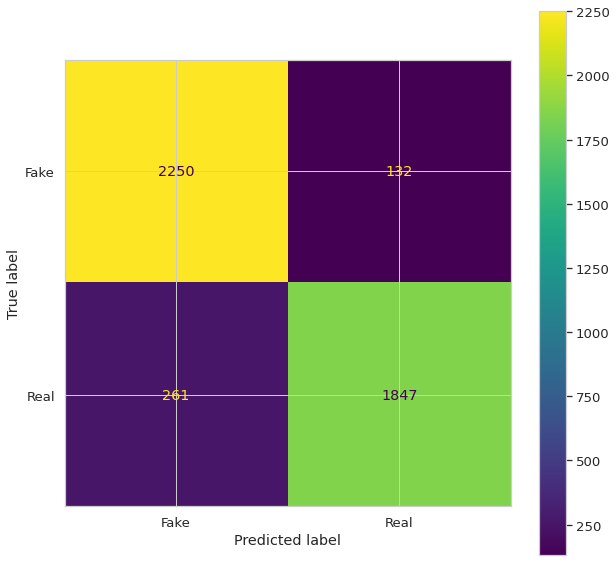

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_knn_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()
# Liệu đó ti

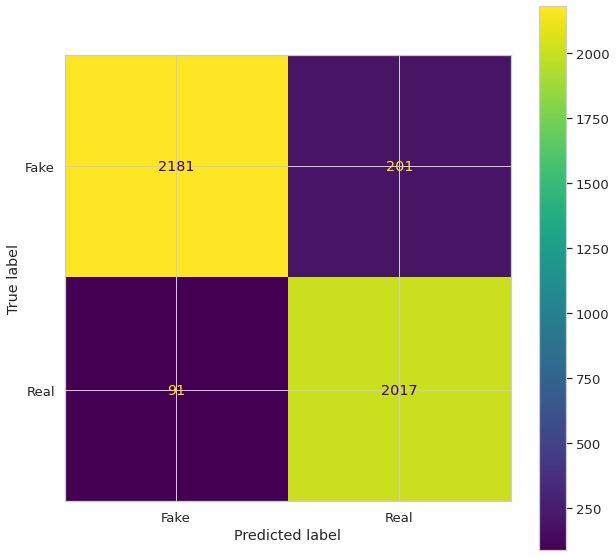

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_gauss_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test, y_gauss_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2382
           1       0.91      0.96      0.93      2108

    accuracy                           0.93      4490
   macro avg       0.93      0.94      0.93      4490
weighted avg       0.94      0.93      0.94      4490



[0.00631329 0.00670145 0.00739675 0.00478494 0.00378357 0.00216759
 0.00233394 0.00223524 0.01315266 0.00805422 0.0018829  0.00181463
 0.00209499 0.00172988 0.00195688 0.00227531 0.0051052  0.00305369
 0.00205959 0.0025123  0.00324526 0.00199347 0.00184114 0.00447101
 0.00526651 0.0031462  0.00938624 0.00203478 0.0025313  0.00274929
 0.01314203 0.00213063 0.01240718 0.00534957 0.0023134  0.00177136
 0.01864063 0.00506008 0.04522595 0.00346892 0.002037   0.00716344
 0.00357129 0.00191444 0.00588743 0.00184489 0.02259013 0.00352489
 0.00205201 0.00174728 0.00266241 0.00215942 0.00195641 0.00473648
 0.00205891 0.00161905 0.00248158 0.02721334 0.00456927 0.00919612
 0.0049338  0.00435059 0.00368393 0.00325653 0.00403535 0.00220641
 0.00193343 0.00185081 0.004054   0.0042333  0.00249336 0.00603811
 0.17353487 0.0023952  0.00199882 0.07268596 0.00303425 0.00249476
 0.00438077 0.00298441 0.00213333 0.006456   0.00393499 0.0018002
 0.00244868 0.00248838 0.00258195 0.00614113 0.00457508 0.00689

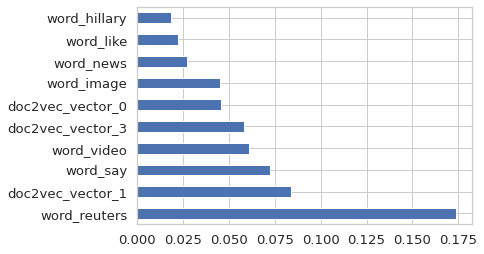

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_tmp,y_train)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X_train.drop(columns=['full_text', 'clean_text']).columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()